In [3]:
#Primeramente  realizaremos importacion de librerias y Un buscador para el conjunto de datos está integrado en Scikit-Learn

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
#Graficamos algunas de estas caras para ver con qué estamos trabajando.

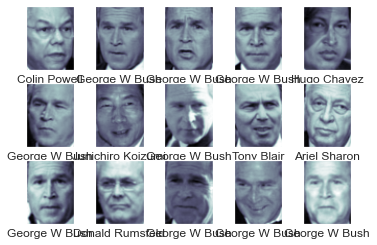

In [3]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
#para extraer 150 componentes fundamentales para alimentar nuestro clasificador de máquinas de vectores de soporte. Podemos hacer esto de la manera más sencilla empaquetando el preprocesador y el clasificador en una sola canalización

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#Si queremos probar la salida de nuestro clasificador, dividiremos los datos en un conjunto de entrenamiento y prueba.

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
#Como ultimo paso  podemos usar una validación cruzada de búsqueda en cuadrícula para explorar combinaciones de parámetros. Aquí ajustaremos C(que controla la dureza del margen) y gamma(que controla el tamaño del núcleo de la función de base radial), y determinaremos el mejor modelo

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

NameError: name 'model' is not defined

In [ ]:
#Los valores óptimos caen hacia la mitad de nuestra cuadrícula; si cayeran en los bordes, querríamos expandir la cuadrícula para asegurarnos de haber encontrado el verdadero óptimo.

Ahora, con este modelo de validación cruzada, podemos predecir las etiquetas de los datos de prueba, que el modelo aún no ha visto

In [21]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
#Si queremos realizar un vistazo a algunas de las imágenes de prueba junto con sus valores predichos utilizaremos el siguiente metodo

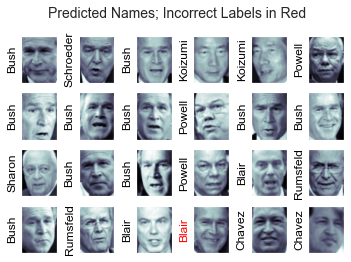

In [22]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
#De esta pequeña muestra, nuestro estimador óptimo etiquetó incorrectamente solo una cara (la cara de Bush en la fila inferior se etiquetó incorrectamente como Blair). Podemos tener una mejor idea del rendimiento de nuestro estimador utilizando el informe de clasificación, que enumera las estadísticas de recuperación etiqueta por etiqueta.

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [ ]:
#también podríamos mostrar la matriz de confusión entre estas clases de la siguiente manera.

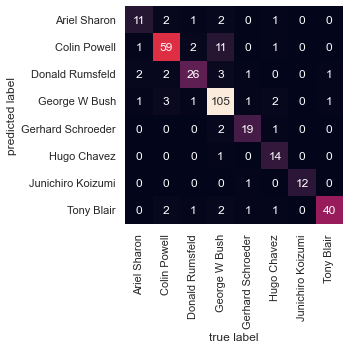

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#inicialmente esto nos ayuda a tener una idea de qué etiquetas es probable que el estimador confunda.

In [ ]:
#CONCLUSION : Debido a que solo se ven afectados por puntos cercanos al margen, funcionan bien con datos de alta dimensión, incluso datos con más dimensiones que muestras, lo cual es un régimen desafiante para otros algoritmos.Su integración con los métodos del núcleo los hace muy versátiles, capaces de adaptarse a muchos tipos de datos.